# Chapter 9: Learning and Adaptation

학습과 Adaptation은 인공지능 에이전트의 역량을 향상시키는 데 있어서 핵심적이다.    
이러한 과정은 에이전트가 미리 정의된 매개변수를 넘어, 경험과 환경과의 상호작용으로 에이전트 스스로 개선될 수 있도록 해준다.    
학습으로 에이전트는 새로운 상황을 효과적으로 다루고, 지속적인 수동 개입 없이도 성능을 최적화할 수 있다.     

## The big picture
에이전트는 새로운 경험과 데이터에 기반해 사고 방식, 행동, 지식을 변화시키며 학습하고 적응한다.    
이를 통해 에이전트는 단순히 지시만 따르는 수준에서 벗어나, 시간이 지날수록 점점 더 똑똑해지는 존재로 진화할 수 있다.

- **Reinforcement Learning(강화학습):** 

	에이전트가 여러 행동을 시도하고, 긍정적인 결과에는 보상을, 부정적인 결과에는 벌점을 받으면서 변화하는 상황에서 최적의 행동을 학습한다.
로봇을 제어하거나 게임을 플레이하는 에이전트에 유용하다.
- **Supervised Learning(지도학습):**

	레이블이 붙은 예시 데이터를 통해 입력과 원하는 출력 간의 관계를 학습한다. 이를 통해 의사결정이나 패턴 인식 같은 작업을 수행할 수 있으며, 이메일 분류나 추세 예측을 하는 에이전트에 적합하다.
- **Unsupervised Learning(비지도학습):**

	레이블이 없는 데이터에서 숨겨진 연결 관계와 패턴을 발견한다. 이는 인사이트 도출, 데이터 조직화, 환경에 대한 정신적 지도(mental map)를 만드는 데 도움을 준다. 구체적인 지시 없이 데이터를 탐색하는 에이전트에 유용하다.
- **Few-Shot/Zero-Shot Learning with LLM-Based Agents(LLM 기반 에이전트의 퓨샷/제로샷 학습):** 

	LLM을 활용하는 에이전트는 소수의 예시만으로(few-shot) 또는 명확한 지시만으로(zero-shot) 새로운 작업에 빠르게 적응할 수 있다. 이를 통해 새로운 명령이나 상황에 빠르게 대응할 수 있다.
- **Online Learning(온라인 학습):**

	에이전트가 새로운 데이터가 들어올 때마다 지식을 지속적으로 업데이트하는 방식이다. 동적인 환경에서 실시간 반응과 지속적인 적응이 필요할 때 필수적이며, 연속적인 데이터 스트림을 처리하는 에이전트에 특히 중요하다.
- **Memory-Based Learning(메모리 기반 학습):**

	에이전트가 과거 경험을 기억해 두었다가, 비슷한 상황에서 이를 회상하여 현재 행동을 조정하는 방식이다. 이는 문맥 인식과 의사결정을 강화하며, 메모리 회상 능력을 가진 에이전트에 효과적이다.

## Proximal Policy Optimization (PPO)란?

Proximal Policy Optimization(PPO)는 **연속적인 행동 공간**을 가진 환경에서  
에이전트를 학습시키기 위해 사용되는 강화학습 알고리즘이다.  
예를 들어:

- 로봇 관절을 제어하는 문제  
- 게임 속 캐릭터 움직임을 제어하는 문제  

PPO의 주요 목표는 에이전트의 **정책(policy: 의사결정 전략)** 을  
**안정적이고 신뢰할 수 있게 향상시키는 것**이다.

## PPO의 핵심 아이디어

PPO의 핵심은 **정책을 한 번에 크게 바꾸지 말고,  
작고 조심스러운 업데이트를 반복**하는 데 있다.

만약 정책이 한 번에 너무 크게 바뀌면:

- 지금까지 잘 배우던 전략이 갑자기 망가지고  
- 성능이 “뚝” 떨어지는 **붕괴(collapse)** 가 발생할 수 있다.

## PPO가 동작하는 방식

### 1. 데이터 수집 (Collect Data)

에이전트는 **현재 정책**을 사용해 환경과 상호작용한다.  
예를 들어:

- 게임을 플레이하면서  
- 각 시점에서 상태(state), 행동(action), 보상(reward)을 기록한다.

이렇게 해서 하나의 **경험 배치(batch of experiences)** 를 모은다.

> (상태, 행동, 보상)들의 묶음 데이터를 수집하는 단계.

### 2. “대리(surrogate)” 목적 함수 평가  
(Evaluate a "Surrogate" Goal)

PPO는 **정책을 어떻게 업데이트하면 기대 보상이 달라질지**를 계산한다.  
여기서 바로 그 값을 직접 최대화하는 대신에,  
**특별한 형태의 “클리핑(clipped)” 목적 함수를 사용**한다.

이 목적 함수가 바로 **“surrogate objective(대리 목적 함수)”** 이다.

### 3. 클리핑(Clipping) 메커니즘

클리핑은 PPO의 **안정성의 핵심**이다.

- 현재 정책을 기준으로  
  **“trust region(신뢰 구간, 안전 구역)”** 을 만든다.
- 새로운 정책이 이 구역에서 **너무 멀어지지 못하게** 만든다.

즉:

- 정책을 업데이트하되,
- **“이 정도 비율 이상으로는 바꾸지 마”** 라고 제한을 거는 것.

이 **클리핑은 안전 브레이크(safety brake)** 처럼 작동하여,

- 에이전트가 이전에 잘 학습한 전략과  
  **완전히 동떨어진 위험한 정책으로 확 바뀌는 것**을 막아준다.

---

## 정리

> PPO는  
> **성능을 올리려는 욕심(정책 개선)** 과  
> **너무 멀리 뛰지 않으려는 안전 장치(클리핑, trust region)**  
> 를 동시에 고려하는 알고리즘이다.

그래서 결과적으로:

- 학습 중 **갑작스러운 성능 붕괴(“한 방에 망함”)를 줄이고**
- 더 **안정적인 강화학습**을 가능하게 만든다.

## Direct Preference Optimization (DPO)란?

Direct Preference Optimization(DPO)는 **대규모 언어 모델(LLM)을 인간의 선호에 맞게 정렬(alignment)** 하기 위해 최근에 제안된 방법이다.  
이 방법은 같은 목적을 PPO로 달성하던 기존 방식보다 **더 단순하고 직접적인 접근**을 제공한다.

---

### PPO 방식: 두 단계 프로세스

#### 1. 보상 모델(Reward Model) 학습

먼저 **사람이 평가한 데이터**를 모은다. 예를 들어:

- 사람이 두 개의 LLM 답변을 보고  
  - “Response A가 Response B보다 더 좋다”  
  - 같은 식으로 **어느 답변이 더 나은지 비교(preference)** 해준다.

이런 비교/평가 데이터를 사용해서:

- **보상 모델(reward model)** 이라는 **별도의 AI 모델**을 학습한다.
- 이 모델의 역할:
  > 새로운 답변이 들어왔을 때  
  > “사람이 이 답변에 몇 점 정도 줄 것 같은지” 점수를 예측하는 것.

#### 2. PPO로 LLM 파인튜닝

그 다음에는 **PPO 알고리즘**을 사용해 **LLM을 파인튜닝**한다.

- LLM의 목표:
  > 보상 모델이 높은 점수를 줄 것 같은 답변을 생성하는 방향으로  
  > 자신의 정책(policy, 출력 분포)을 바꾸는 것.

- 이때 보상 모델은:
  - LLM이 만든 답변을 보고
  - 점수를 매기고
  - 그 점수가 PPO 학습에서 **보상 신호**로 사용된다.

즉:

> LLM(플레이어)이 있고  
> 보상 모델(심판)이 있고  
> PPO(게임 규칙)를 통해  
> “심판이 좋아할 만한 답변을 잘 하도록” LLM을 훈련하는 구조.

## PPO 방식의 문제점

이 **두 단계 방식(보상 모델 + PPO)** 은 강력하지만, **복잡하고 불안정할 수 있다.**

예를 들어:

- LLM이 **보상 모델의 허점을 이용해 점수만 높게 받는 “이상한 답변”** 을 학습할 수 있다.
  - 사람 기준으로는 별로인데,
  - 보상 모델이 속아서 높은 점수를 주는 경우 → **reward hacking(보상 해킹)**

---

## DPO 방식: 더 직접적인 정렬

### 핵심 아이디어: “보상 모델 생략”

DPO는 **보상 모델을 아예 없애버린다.**

- 인간 선호 데이터를
  - 먼저 **보상 함수로 변환하고**
  - 그걸 다시 **PPO로 최적화하는 간접 경로** 대신
- **선호 데이터 자체를 바로 이용해** LLM의 정책을 업데이트한다.

### 어떻게 동작하나?

DPO는 **수학적인 관계를 이용해** 다음을 직접 연결한다.

- 인간 선호 데이터:  
  - 예: “A 답변이 B 답변보다 더 좋다”
- 최적 정책(LLM의 출력 분포):  
  - “그렇다면 어떤 답변의 확률을 올리고/내려야 하는가?”

좀 더 직관적으로 말하면:

- “좋다고 선택된 스타일의 답변은 **더 자주 나오게**”
- “별로라고 평가된 답변은 **덜 나오게**”

하도록 **언어 모델의 분포 자체를 직접 조정**하는 것이다.

---

## 정리

> **DPO는 인간 선호 데이터로부터 직접 LLM을 최적화하는 방법**이다.  
> 별도의 보상 모델 없이도,  
> “사람이 더 좋아한 응답의 확률을 올리고, 덜 좋아한 응답의 확률을 낮추는” 방식으로  
> LLM을 인간 취향에 맞게 정렬한다.

이렇게 함으로써:

- 보상 모델을 만들고 관리하는 복잡성을 줄이고
- PPO 기반 방법에서 발생하던 **불안정성, 보상 해킹 문제**를 완화하며
- 전체 정렬 과정이 **더 단순하고, 효율적이고, 견고해진다.**

## Practical Applications & Use Cases

적응형 에이전트(adaptive agents)는 경험 기반 데이터로부터 반복적으로 업데이트됨으로써, 환경이 계속 변하는 상황에서도 더 높은 성능을 발휘할 수 있다.

- **Personalized Assistant Agents(개인화 비서 에이전트):**

	개인화 비서 에이전트는 개별 사용자의 행동을 장기간 분석하여 상호작용 프로토콜을 지속적으로 정교화함으로써, 각 사용자에게 최적화된 응답을 생성한다.

- **Trading Bot Agents(트레이딩 봇 에이전트):**

	트레이딩 봇 에이전트는 고해상도 실시간 시장 데이터를 바탕으로 모델 파라미터를 동적으로 조정하여 의사결정 알고리즘을 최적화하고, 재무 수익을 극대화하는 동시에 위험 요인을 완화한다.

- **Application Agents(애플리케이션 에이전트):**

	애플리케이션 에이전트는 관찰된 사용자 행동에 따라 사용자 인터페이스와 기능을 동적으로 수정·최적화함으로써, 사용자 참여도를 높이고 시스템의 직관성과 사용성을 향상시킨다.

- **Robotic & Autonomous Vehicle Agents(로봇 및 자율주행 에이전트):**

	로봇 및 자율주행 에이전트는 센서 데이터와 과거 행동 기록 분석을 통합하여 내비게이션과 반응 능력을 향상시키며, 다양한 환경 조건에서도 안전하고 효율적인 운행을 가능하게 한다.

- **Fraud Detection Agents(사기 탐지 에이전트):**

	사기 탐지 에이전트는 새롭게 발견된 사기 패턴을 예측 모델에 지속적으로 반영하여 이상 징후 탐지 성능을 개선하고, 시스템 보안을 강화하며 재정적 손실을 최소화한다.

- **Recommendation Agents(추천 에이전트):**

	추천 에이전트는 사용자 선호 학습 알고리즘을 활용하여 콘텐츠 선택의 정밀도를 높이고, 각 사용자에게 고도로 개인화되고 맥락적으로 적절한 추천을 제공한다.

- **Game AI Agents(게임 AI 에이전트):**

	게임 AI 에이전트는 플레이어 행동과 실력에 맞춰 전략 알고리즘을 동적으로 조정함으로써, 게임의 복잡도와 도전성을 증가시키고 플레이어의 몰입도와 재미를 향상시킨다.

- **Knowledge Base Learning Agents(지식 기반 학습 에이전트):**

	지식 기반 학습 에이전트는 RAG(Retrieval Augmented Generation)를 활용해 문제 설명과 검증된 해결책으로 구성된 동적 지식 베이스를 유지하며, 축적된 성공 전략과 실패 경험을 의사결정에 참조하여 새로운 상황에 더 효과적으로 적응한다.

## Case Study: The Self-Improving Coding Agent(SICA)

- **SICA 개요:**

	SICA(Self-Improving Coding Agent)는 자기 개선 코딩 에이전트로, **에이전트가 자기 자신의 소스 코드를 직접 수정하는 능력**을 보여준다.  
	SICA는 **수정하는 주체와 수정되는 대상이 동일한 에이전트**라는 점이 특징이다.  
	즉, 스스로 자신의 코드베이스를 반복적으로 개선하며 다양한 코딩 과제에서의 성능을 향상시킨다.

- **자기 개선 루프(Iterative Self-Improvement Cycle):**

    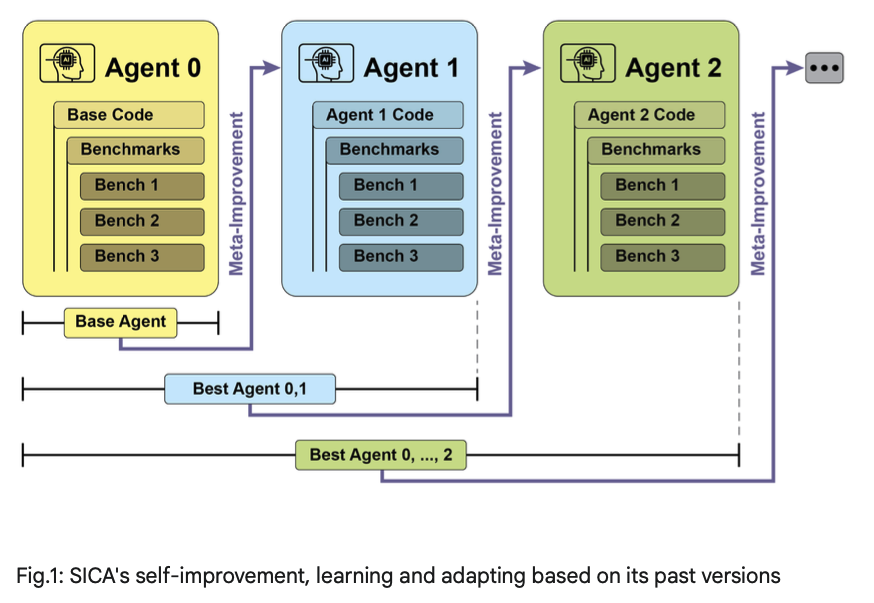

	SICA의 자기 개선은 반복적인 사이클을 통해 이루어진다(텍스트 상 Fig. 1 참조).

	1. SICA는 먼저 **과거 버전들의 아카이브**와 각 버전이 **벤치마크 테스트에서 기록한 성능**을 검토한다.  
	2. 성공 여부, 수행 시간, 계산 비용 등을 가중치로 반영한 점수 공식에 따라 **가장 높은 성능 점수를 가진 버전**을 선택한다.  
	3. 선택된 버전이 다음 라운드의 **자기 수정(Self-modification)** 을 수행한다.  
	   - 아카이브를 분석하여 개선 가능성을 찾고  
	   - 자신의 코드베이스를 직접 수정한다.  
	4. 수정된 에이전트는 다시 벤치마크 테스트를 수행하고, 그 결과가 아카이브에 기록된다.  
	5. 이 과정이 반복되면서, SICA는 과거 성능 데이터를 바탕으로 **직접 학습·진화**한다.

	이 메커니즘 덕분에 SICA는 전통적인 “훈련 데이터 + 외부 트레이너” 방식 없이도, **자기 성능을 스스로 개선하는 구조**를 가진다.

- **SICA 아키텍처 개요:**

	SICA의 아키텍처는 다음과 같은 **기본 툴킷과 서브 에이전트 모듈**로 구성된다.

	- 기본 툴킷:
		- 파일 읽기/쓰기 등 **기본 파일 조작**
		- **명령어 실행(command execution)**
		- **산술 계산** 등
	- 결과 제출 및 서브 에이전트 호출 메커니즘:
		- 코딩 에이전트(coding agent)
		- 문제 해결 에이전트(problem-solving agent)
		- 추론 에이전트(reasoning agent) 등  
	이 서브 에이전트들은 복잡한 작업을 분해하고, 특히 **긴 자기 개선 루프(meta-improvement iterations)** 동안  
	LLM의 컨텍스트 길이를 효과적으로 관리하는 역할을 한다.

- **비동기 오버시어(Asynchronous Overseer)의 역할:**

	SICA 시스템에는 또 하나의 LLM이 **오버시어(감독자)** 로서 비동기적으로 동작한다.

	- 오버시어는 SICA의 행동을 모니터링하며,  
	  **무한 루프, 비생산적인 반복, 학습 정체(stagnation)** 같은 문제를 탐지한다.
	- 필요시 SICA에게 메시지를 보내 경고하거나, **에이전트 실행을 중단(cancel)** 할 수 있다.
	- 오버시어는 다음과 같은 상세 정보를 입력으로 받는다.
		- 전체 호출 흐름(callgraph)
		- 메시지와 툴 호출, 서브 에이전트 호출 및 결과에 대한 로그  
	  이를 통해 비효율 패턴이나 반복 작업을 식별한다.

- **컨텍스트 윈도우(단기 메모리) 구조:**

	SICA의 LLM은 자신의 **컨텍스트 윈도우(단기 메모리)** 안의 정보를 구조적으로 조직한다.  
	이 구조는 성능과 효율에 매우 중요하다.

	- **System Prompt:**
		- 에이전트의 목표
		- 사용 가능한 툴 및 서브 에이전트 문서
		- 시스템 수준 지침 등을 정의한다.
	- **Core Prompt:**
		- 현재 문제 설명 또는 명령
		- 열린 파일의 내용
		- 디렉터리 구조/맵
	- **Assistant Messages:**
		- 에이전트의 단계별 추론 과정
		- 툴 및 서브 에이전트 호출/결과 기록
		- 오버시어와의 통신 내역 등  

	이런 조직화된 구조 덕분에 **정보 흐름이 효율적으로 유지**되고,  
	LLM의 처리 시간과 비용을 줄일 수 있다.  
	초기에는 파일 변경 내역을 diff 형태로 기록하고, 일정 주기마다 이를 통합하는 방식도 사용했다.

- **코드 레벨 설계 특징:**

	“SICA: A Look at the Code” 관점에서 보면, 구현 측면에서 몇 가지 중요한 설계 선택이 드러난다.

	- **모듈형 아키텍처(Modular Architecture):**
		- 메인 에이전트가 여러 서브 에이전트(코딩, 문제 해결, 추론)를  
		  **툴 호출처럼 호출하는 구조**로 설계되어 있다.
		- 이를 통해 복잡한 작업을 분해하고, 긴 메타 개선 과정에서도  
		  **컨텍스트 길이를 효율적으로 관리**할 수 있다.
	- **오픈소스 및 확장성:**
		- 이 프로젝트는 활발히 개발 중이며,  
		  **도구 사용 및 기타 에이전트 작업에 대해 사후(post-training) LLM을 훈련**하고자 하는 이들을 위한  
		  견고한 프레임워크를 지향한다.
		- 전체 코드는 GitHub에서 공개되어 있으며,  
		  `https://github.com/MaximeRobeyns/self_improving_coding_agent/`  
		  저장소에서 탐색 및 기여가 가능하다.

- **LLM 지원 및 오버시어 재강조:**

	- 앞서 언급한 비동기 오버시어는 메인 에이전트와 **동시에(concurrently)** 실행되며,  
	  주기적으로 에이전트의 행동을 평가한다.
		- 비정상적인 편차나 정체를 감지하면 알림을 보내거나 실행을 취소할 수 있다.
		- 오버시어는 시스템 상태의 텍스트 표현(콜그래프, 이벤트 스트림: LLM 메시지, 툴 호출, 응답 등)을 받아  
		  **비효율 패턴, 반복 작업, 병목**을 탐지한다.

- **열린 과제: 창의적인 자기 개선의 어려움**

	초기 SICA 구현에서 드러난 중요한 난제 중 하나는,  
	**LLM 기반 에이전트가 각 메타 개선 단계에서 스스로 “새롭고, 혁신적이며, 실행 가능하고, 흥미로운” 수정 아이디어를 제안하도록 유도하는 것**이었다.

	- 즉, 에이전트가 단순한 미세 조정 수준을 넘어서  
	  **진짜 의미 있는 창의적 변화**를 스스로 만들어내도록 하는 것이 쉽지 않았다.
	- 이러한 한계는 특히 **열린(open-ended) 학습과 LLM 에이전트의 진정한 창의성**을 어떻게 끌어낼 것인가라는 문제와 연결되며,  
	  여전히 활발히 연구가 진행 중인 핵심 주제이다.

##  AlphaEvolve

AlphaEvolve는 구글이 개발한 **알고리즘 발견 및 최적화용 AI 에이전트**로, 이론 수학과 실용 컴퓨팅 모두를 발전시키는 것을 목표로 한다.	
LLM(특히 Gemini Flash/Pro), 자동 평가 시스템, 진화 알고리즘 프레임워크를 결합해 **새로운 알고리즘을 생성·평가·개선**한다.

### AlphaEvolve의 구성 및 동작 방식

Gemini 모델 앙상블을 사용한다.

- **Gemini Flash:**		
	다양한 초기 알고리즘 제안들을 대량으로 생성하는 역할을 한다.
- **Gemini Pro:** 		
	Flash가 낸 제안들을 더 깊이 분석·정제하여 개선된 알고리즘으로 다듬는다.

생성된 알고리즘은 **사전에 정의된 기준에 따라 자동으로 평가·점수화**되고,	
이 피드백을 기반으로 해를 반복적으로 개선하면서 **최적화되고 새로운 알고리즘**에 도달한다.


## OpenEvolve

OpenEvolve는 LLM을 활용해 **코드를 진화적으로 최적화하는 에이전트**로,

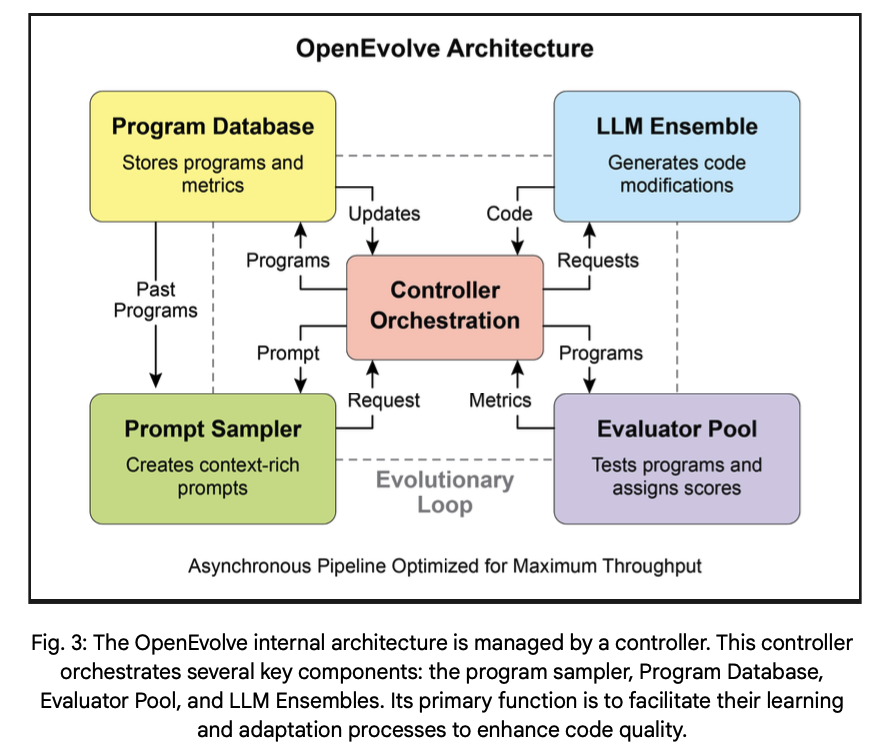

LLM 중심의 코드 생성 → 평가 → 선택 파이프라인을 구성하여 **다양한 작업에 대해 프로그램을 지속적으로 개선**한다.

### OpenEvolve의 특징 및 기능

- **전체 코드 파일 단위 진화:**		

	단일 함수에만 국한되지 않고, **파일 전체를 진화시킬 수 있는 능력**을 갖추고 있다.

- **다언어 및 LLM 호환성:**		

	여러 프로그래밍 언어를 지원하며, 어떤 LLM이든 **OpenAI 호환 API**를 통해 연동 가능하도록 설계되어 있다.

- **다목적 최적화(Multi-objective Optimization):**		

	성능, 자원 사용, 안정성 등 여러 목표를 동시에 고려하는 **다목적 최적화**를 지원한다.

- **유연한 프롬프트 엔지니어링:**		

	사용자가 다양한 방식으로 프롬프트를 설계·변형할 수 있도록 유연한 인터페이스를 제공한다.

- **분산 평가(Distributed Evaluation):**		

	복잡하고 대규모인 코딩 과제를 효율적으로 다루기 위해,여러 환경에서 **분산 평가를 수행**할 수 있는 구조를 갖추고 있다.